# pandas-ml-qunat - The Pandas Machine Leraning and Quant Finance Library

This is the root repository of the follwoing 3 core components:

* pandas-ml-common - a more general utilities and monkey patched pandas objects provider
* pandas-ml-quant - provides technical analysis inidcators, plots, loss functions, etc.
* pandas-ml-utils - apply statistical or ml models directly to data frames

## Demonstration of all 3 libraries used together
### First import needed objects

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from pandas_ml_utils.ml.data.extraction import extract_with_post_processor
from pandas_ml_utils.ml.summary import ClassificationSummary
from pandas_ml_utils import FeaturesAndLabels, Model, SkModel
from pandas_ml_quant import pd, np

automatically imported pandas_ml_utils 0.1.0


### Next fetch some stock data and plot it

Note that:
1. all indicators and charting functionalities are behind the **q**and property attached to all pandas objects
1. the **m**achine**l**earning proptery provides access to (raw) data as it is useful/needed by statistical and ml models
1. all model relevant functionalities are behind the **model** property


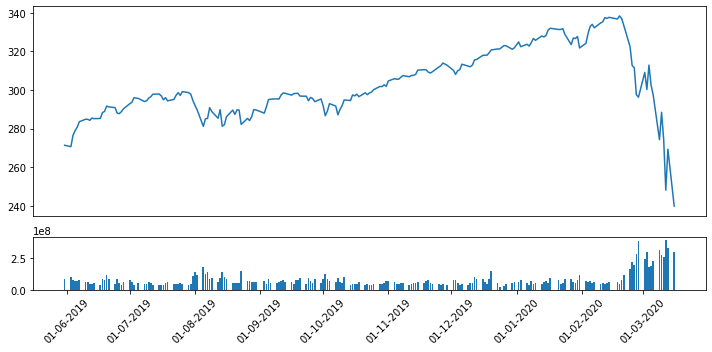

In [2]:
df = pd.fetch_yahoo("SPY")

# NOTE the access to the q_uant property
df[-200:].q.ta_plot(figsize=(10, 5))()

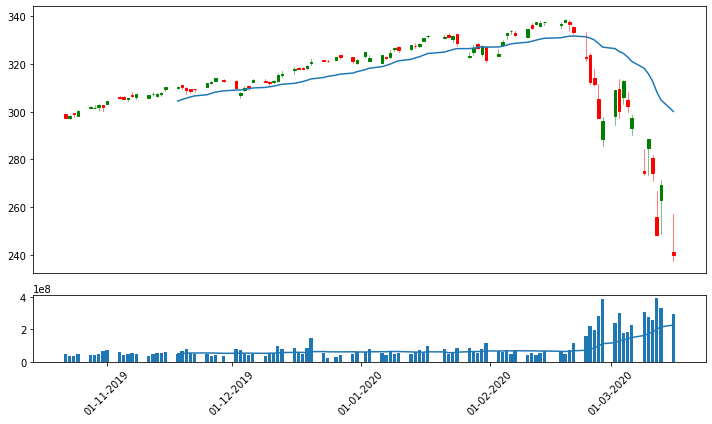

In [3]:
plt = df[-100:].q.ta_plot(figsize=(10, 6))
plt.candlestick()
plt.line(df[-100:]["Close"].q.ta_sma(period=20))
plt.bar("Volume")
plt.line(df[-100:]["Volume"].q.ta_sma(period=20), panel=1)

### Next think of a predictive model
Lets say we want to predict whether the price in the future will be above or below the current moving average:
`df["Close"].q.ta_future_pct_to_current_mean(14, 5) > 0`

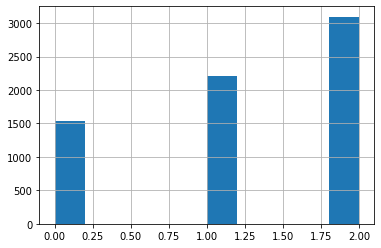

In [4]:
# NOTE all technical analysis starts with the "ta_" prefix
df["Close"].q.ta_future_bband_quantile().hist()

And we want to predict this binary event based on a set of indicators like the RSI (Relative Strength Index) and such.

So we can build up a features and labels definition like so:

In [5]:
fnl = FeaturesAndLabels(
    features=[
        lambda df: df["Close"].q.ta_macd(),
        lambda df: df["Close"].q.ta_apo(),
        lambda df: df["Close"].q.ta_rsi(),
        lambda df: df["Close"].q.ta_roc(),
        lambda df: df["Close"].q.ta_trix(),
        lambda df: df["Close"].q.ta_ppo(),
        lambda df: df["Close"].pct_change().q.ta_zscore() / 4.,
        lambda df: df["Close"].q.ta_week_day(),
        lambda df: df["Close"].q.ta_week(),
        lambda df: df["Close"].q.ta_up_down_volatility_ratio(),
        lambda df: df.q.ta_adx(), 
        lambda df: df.q.ta_atr(),
        lambda df: df.q.ta_tr(),
        lambda df: df.q.ta_williams_R(),
        lambda df: df.q.ta_ultimate_osc(),
        lambda df: df.q.ta_bop(),
        lambda df: df.q.ta_cci(),
    ],
    labels=[
        lambda df: df["Close"].q.ta_future_pct_to_current_mean(14, 5) > 0
    ]
)

# NOTE the df.ml property provides access to (raw) data as it is useful/needed by statistical models
features, labels, targets, weights = df.ml.extract(fnl)
features.describe()

  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



,"macd_12,26,9","signal_12,26,9","histogram_12,26,9","Close_apo_12,26,0",Close_rsi_14,Close_roc_10,Close_trix_30,"Close_ppo_12,26,1",Close_z_20,dow,...,-DM,+DI,-DI,ADX,atr_14,true_range,williams_R_14,"ultimate_osc_7,14,28",bop,cci_14
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,...,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,0.002438,0.002462,-0.000024,1.002543,0.549286,0.003982,0.036931,0.002438,-0.007646,0.336791,...,0.003472,0.002994,0.002841,0.231616,1.491442,1.517794,0.377793,0.546787,0.035672,0.239781
std,0.010928,0.010213,0.003357,0.015271,0.113859,0.031527,0.104853,0.010928,0.246428,0.233441,...,0.002769,0.002434,0.002135,0.083960,0.955002,1.444685,0.301450,0.101944,0.535303,1.052678
min,-0.074439,-0.067679,-0.026184,0.891753,0.167987,-0.267695,-0.558651,-0.074439,-0.972346,0.000000,...,0.000385,0.000195,0.000205,0.076091,0.147346,0.040000,0.000000,0.213749,-1.000000,-3.522097
25%,-0.002281,-0.001864,-0.001826,0.995333,0.468689,-0.010855,-0.004697,-0.002281,-0.160258,0.166667,...,0.001729,0.001473,0.001468,0.168681,0.906818,0.750000,0.104961,0.474868,-0.418288,-0.568153
50%,0.004360,0.004186,-0.000021,1.004710,0.557260,0.006616,0.053177,0.004360,-0.008163,0.333333,...,0.002673,0.002294,0.002270,0.217168,1.332688,1.200000,0.306600,0.550379,0.052982,0.463474
75%,0.009252,0.008945,0.001735,1.011821,0.634062,0.021489,0.100337,0.009252,0.153027,0.500000,...,0.004238,0.003371,0.003374,0.278959,1.847448,1.860000,0.628326,0.621075,0.500000,1.054951
max,0.030255,0.026989,0.018455,1.059521,0.872283,0.215963,0.248463,0.030255,0.839008,0.666667,...,0.027597,0.015448,0.017921,0.590979,13.752851,31.960000,1.000000,0.846781,1.000000,3.215749


Since we have no idea which features are actually "good" to predict the label, we want to do some feature analysis fist.


In [6]:
#features, lags = df.model.feature_selection(fnl)

In [7]:
#features
#df["Close"].q.ta_macd().ml[['signal.*', 'macd_.*']]

Looks like 'Close_trix_30', 'Close_ppo_12,26,1', 'Close_apo_12,26,0', 'signal_12,26,9', 'macd_12,26,9' are the top 5 features to predict the label 
(which is wheter the 60 sma is crossing the20 sma withing the next 5 days or not)

So we can now build up a model from the learnings we have made.

In [8]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents

fit = df.model.fit(
    SkModel(
        MLPClassifier(activation='tanh', hidden_layer_sizes=(60, 50), random_state=42, warm_start=True),
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    lambda df: df["Close"].q.ta_macd().ml[['macd.*', 'signal.*']],
                    lambda df: df.q.ta_adx().ml[['+DI', '-DM', '+DM']],
                    lambda df: df["Close"].q.ta_mom(),
                    lambda df: df["Close"].q.ta_apo(),
                    lambda df: df.q.ta_atr(),
                    lambda df: df["Close"].q.ta_trix(),
                ],
                lambda df: df.q.ta_rnn(280)
            ),
            labels=[
                lambda df: df["Close"].q.ta_future_bband_quantile().q.ta_one_hot_encode_discrete()

            ],
            min_required_samples=280
        ),
        summary_provider=ClassificationSummary,
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
    # cross_validation=(1, KEquallyWeightEvents(n_splits=3).split),
)

fit

TypeError: 'int' object is not subscriptable

In [26]:
fit

(3880, 3)
(2587, 3)


It very much looks like the model has a good accuracy but when we look at the confusion matrix, then we can see that the true event (averages are crosing each other) is never predicted.
So this model just says no and most of the time this is correct. It is as if a model predicts "today is not Christmas" which would also have an accuracy of 99.7. However it fails miserably to predict Christmas.

Thi is why we need to fix this under representation of classes by either using sample weights or by boosting the samples in a cross validation algorithm.

Lets try to use a k-fold cross validation algorithm with sample boosing

In [ ]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents
from pandas_ml_utils import KerasModel

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Reshape, ActivityRegularization
from keras.callbacks import EarlyStopping
from keras import backend as K 

# first clear tensorflow session
K.clear_session()

return

def provider():
    # create model
    model = Sequential()
    model.add(Reshape((101 * 11, ), input_shape=(101, 11)))
    # model.add(ActivityRegularization(l1=0.002))
    model.add(Dense(60, activation='tanh'))
    model.add(Dense(50, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mse',
                  optimizer=Adam(lr=0.0001), 
                  metrics=['accuracy'],
                 )
    
    return model
    
fit = df.model.fit(
    KerasModel(
        provider,
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    lambda df: df.q.ta_cci(),
                    lambda df: df.q.ta_atr(),
                    lambda df: df.q.ta_adx(),
                    lambda df: df["Close"].q.ta_trix(),
                ],
                lambda df: df.q.ta_rnn(lags)
            ),
            labels=[
                lambda df: df["Close"].q.ta_future_pct_to_current_mean(14, 5) > 0

            ],
            min_required_samples=max(lags)
        ),
        summary_provider=ClassificationSummary,
        # keras fit parameters
        verbose=0,
        batch_size=128,
        callbacks=[lambda: EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)], 
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
    cross_validation=(1, KFoldBoostRareEvents(n_splits=3).split),
    
)

fit